# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Подключим-необходимые-библиотеки." data-toc-modified-id="Подключим-необходимые-библиотеки.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключим необходимые библиотеки.</a></span></li><li><span><a href="#Откроем-таблицу,-посмотрим-внешний-вид-и-изучим-общую-информацию-о-данных." data-toc-modified-id="Откроем-таблицу,-посмотрим-внешний-вид-и-изучим-общую-информацию-о-данных.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Откроем таблицу, посмотрим внешний вид и изучим общую информацию о данных.</a></span></li></ul></li><li><span><a href="#Подготовка-признаков-обучения" data-toc-modified-id="Подготовка-признаков-обучения-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка признаков обучения</a></span><ul class="toc-item"><li><span><a href="#Соберем-стоп-слова." data-toc-modified-id="Соберем-стоп-слова.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Соберем стоп-слова.</a></span></li><li><span><a href="#Напишем-функции-лемматизации-и-очистки-текста" data-toc-modified-id="Напишем-функции-лемматизации-и-очистки-текста-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Напишем функции лемматизации и очистки текста</a></span></li><li><span><a href="#Лемматизируем-и-очистим-текст" data-toc-modified-id="Лемматизируем-и-очистим-текст-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Лемматизируем и очистим текст</a></span></li><li><span><a href="#Напишем-функцию-разделения-данных-c-отображением-дисбаланса-меток-1-и-0" data-toc-modified-id="Напишем-функцию-разделения-данных-c-отображением-дисбаланса-меток-1-и-0-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Напишем функцию разделения данных c отображением дисбаланса меток 1 и 0</a></span></li><li><span><a href="#Создадим-три-выборки." data-toc-modified-id="Создадим-три-выборки.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Создадим три выборки.</a></span></li><li><span><a href="#Напишем-функцию-&quot;борьбы&quot;-с-дисбалансом,-воспользуемся-техниками-увеличение-выборки-(upsampling),-уменьшение-выборки(downsampling)." data-toc-modified-id="Напишем-функцию-&quot;борьбы&quot;-с-дисбалансом,-воспользуемся-техниками-увеличение-выборки-(upsampling),-уменьшение-выборки(downsampling).-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Напишем функцию "борьбы" с дисбалансом, воспользуемся техниками увеличение выборки (upsampling), уменьшение выборки(downsampling).</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-построеня-ROC-криваой-и-нахождения-метрики-качества-AUC-ROC-и-представления-F1-меры." data-toc-modified-id="Напишем-функцию-построеня-ROC-криваой-и-нахождения-метрики-качества-AUC-ROC-и-представления-F1-меры.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию построеня ROC-криваой и нахождения метрики качества AUC-ROC и представления F1 меры.</a></span></li><li><span><a href="#Напишем-функцию-для-классификация-тональности-текста-с-помощью-TF-IDF-признаков." data-toc-modified-id="Напишем-функцию-для-классификация-тональности-текста-с-помощью-TF-IDF-признаков.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Напишем функцию для классификация тональности текста с помощью TF-IDF признаков.</a></span></li><li><span><a href="#Классифицируем-тональность-текста-TF-IDF-признаками." data-toc-modified-id="Классифицируем-тональность-текста-TF-IDF-признаками.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Классифицируем тональность текста TF-IDF признаками.</a></span></li><li><span><a href="#Напишем-функции-обучения-и-подбора-гиперпараметров-в-цикле" data-toc-modified-id="Напишем-функции-обучения-и-подбора-гиперпараметров-в-цикле-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Напишем функции обучения и подбора гиперпараметров в цикле</a></span></li><li><span><a href="#Напишем-функцию,-которая-перебором,-меняя--гиперпараметры-ищет-лучшую-модель-XGBClassifier-по-максимальной-F1-мере." data-toc-modified-id="Напишем-функцию,-которая-перебором,-меняя--гиперпараметры-ищет-лучшую-модель-XGBClassifier-по-максимальной-F1-мере.-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Напишем функцию, которая перебором, меняя  гиперпараметры ищет лучшую модель XGBClassifier по максимальной F1-мере.</a></span></li><li><span><a href="#Напишем-функцию,-которая-перебором,-меняя--гиперпараметры-ищет-лучшую-модель-LogisticRegression-по-максимальной-F1-мере." data-toc-modified-id="Напишем-функцию,-которая-перебором,-меняя--гиперпараметры-ищет-лучшую-модель-LogisticRegression-по-максимальной-F1-мере.-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Напишем функцию, которая перебором, меняя  гиперпараметры ищет лучшую модель LogisticRegression по максимальной F1-мере.</a></span></li><li><span><a href="#Напишем-функцию,-которая-перебором,-меняя--гиперпараметры-ищет-лучшую-модель-по-максимальной-F1-мере." data-toc-modified-id="Напишем-функцию,-которая-перебором,-меняя--гиперпараметры-ищет-лучшую-модель-по-максимальной-F1-мере.-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Напишем функцию, которая перебором, меняя  гиперпараметры ищет лучшую модель по максимальной F1-мере.</a></span><ul class="toc-item"><li><span><a href="#Найдем-лучшие-модели-без-учета-дисбаланса.-Обучать-будем-три-модели-DecisionTreeClassifier,-RandomForestClassifier,-LogisticRegression." data-toc-modified-id="Найдем-лучшие-модели-без-учета-дисбаланса.-Обучать-будем-три-модели-DecisionTreeClassifier,-RandomForestClassifier,-LogisticRegression.-3.7.1"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span>Найдем лучшие модели без учета дисбаланса. Обучать будем три модели DecisionTreeClassifier, RandomForestClassifier, LogisticRegression.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-перебора-параметров-upsampling-и-downsampling-с-обучением-на-этих-параметрах-и-выбором-лучших-результатов" data-toc-modified-id="Напишем-функцию-перебора-параметров-upsampling-и-downsampling-с-обучением-на-этих-параметрах-и-выбором-лучших-результатов-3.9.1"><span class="toc-item-num">3.9.1&nbsp;&nbsp;</span>Напишем функцию перебора параметров upsampling и downsampling с обучением на этих параметрах и выбором лучших результатов</a></span></li><li><span><a href="#Найдем-лучшую-модель-с-учетом-дисбаланса." data-toc-modified-id="Найдем-лучшую-модель-с-учетом-дисбаланса.-3.9.2"><span class="toc-item-num">3.9.2&nbsp;&nbsp;</span>Найдем лучшую модель с учетом дисбаланса.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span><strong>Вывод</strong></a></span><ul class="toc-item"><li><span><a href="#Нашли-лучшие-модели-с-учетом-дисбаланса.--Построим-ROC-кривую-и-найдем-метрику-качества-AUC-ROC-для-каждой-модели" data-toc-modified-id="Нашли-лучшие-модели-с-учетом-дисбаланса.--Построим-ROC-кривую-и-найдем-метрику-качества-AUC-ROC-для-каждой-модели-3.10.1"><span class="toc-item-num">3.10.1&nbsp;&nbsp;</span>Нашли лучшие модели с учетом дисбаланса.  Построим ROC-кривую и найдем метрику качества AUC-ROC для каждой модели</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Классификация-на-эмбеддингах" data-toc-modified-id="Классификация-на-эмбеддингах-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Классификация на эмбеддингах</a></span><ul class="toc-item"><li><span><a href="#Загружаем-перобученные-модель-и-токинезатор" data-toc-modified-id="Загружаем-перобученные-модель-и-токинезатор-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Загружаем перобученные модель и токинезатор</a></span></li><li><span><a href="#Делаем-рандомную-выборку-в-2000-строк-датафрейма" data-toc-modified-id="Делаем-рандомную-выборку-в-2000-строк-датафрейма-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Делаем рандомную выборку в 2000 строк датафрейма</a></span></li><li><span><a href="#Пишем-функцию-токинезирования-текста-с--маской-для-важных-токенов" data-toc-modified-id="Пишем-функцию-токинезирования-текста-с--маской-для-важных-токенов-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Пишем функцию токинезирования текста с  маской для важных токенов</a></span></li><li><span><a href="#Разобьем-на-батчи-и-из-тензора-извлечём-нужные-элементы-и-добавим-в-список-всех-эмбеддингов." data-toc-modified-id="Разобьем-на-батчи-и-из-тензора-извлечём-нужные-элементы-и-добавим-в-список-всех-эмбеддингов.-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Разобьем на батчи и из тензора извлечём нужные элементы и добавим в список всех эмбеддингов.</a></span></li><li><span><a href="#Соберём-все-эмбеддинги-в-матрицу-признаков." data-toc-modified-id="Соберём-все-эмбеддинги-в-матрицу-признаков.-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Соберём все эмбеддинги в матрицу признаков.</a></span></li><li><span><a href="#Создадим-три-выборки:-обучающую,-валидационного-и-тестовую" data-toc-modified-id="Создадим-три-выборки:-обучающую,-валидационного-и-тестовую-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Создадим три выборки: обучающую, валидационного и тестовую</a></span></li><li><span><a href="#Обучим-модели" data-toc-modified-id="Обучим-модели-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Обучим модели</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span><strong>Вывод:</strong></a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Подготовка

### Подключим необходимые библиотеки.

In [83]:
#pip install stop-words

In [84]:
#pip install --upgrade pymystem3

In [85]:
#pip install xgboost

In [86]:
#pip install torch

In [87]:
#pip install transformers

In [88]:
#pip install tensorflow

In [89]:
#pip install bert

In [90]:
#pip install xgboost

In [91]:
#pip install nltk

In [92]:
import pandas as pd
import numpy as np
import copy

from random import randint
import random

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns

import torch

from tqdm import notebook
from transformers import BertModel, BertConfig
import tensorflow as tf
 
import transformers as ppb 

# снимаем ограничения в pandas на количество выводимых рядов и колонок,
# а также на ширину колонок
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from pymystem3 import Mystem
import re 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.utils import shuffle
from sklearn.metrics import (
    f1_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score
)                        

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Имя\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Имя\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Имя\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Имя\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Имя\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Имя\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Откроем таблицу, посмотрим внешний вид и изучим общую информацию о данных.

In [93]:
df = pd.read_csv('C:\\toxic_comments.csv')

display(df.head())
df.info()
print()
print('Количество строк:', df.shape[0])
print()
print('Общее количество ячеек с пропусками в df:', df.isna().sum().sum())

,text,toxic
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB

Количество строк: 159571

Общее количество ячеек с пропусками в df: 0


In [94]:
df['toxic'].value_counts(ascending=False)

0    143346
1     16225
Name: toxic, dtype: int64

## Подготовка признаков обучения

### Соберем стоп-слова.

In [95]:
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english')) 
stop_words.extend(nltk_words)

### Напишем функции лемматизации и очистки текста

In [96]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [97]:
lemmatizer = WordNetLemmatizer()

In [98]:
def lemmatize(text):
    lemm_list = ([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])
    lemm_text = " ".join(lemm_list)    
    return lemm_text

def clear_text(text):
    
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = [word for word in word_tokenize(text) if word not in stop_words]
    text = " ".join(text)
    text = lemmatize(text)
    
    return text    


### Лемматизируем и очистим текст

In [99]:
%%time
df['lemm_text'] = df['text'].apply(clear_text)
df_lemm = df.drop('text', axis=1)[['lemm_text', 'toxic']]
display(df_lemm.head())

,lemm_text,toxic
0,explanation edits make username hardcore metallica fan revert vandalism closure gas vote new york doll fac please remove template talk page since retire,0
1,aww match background colour seemingly stuck thanks talk january utc,0
2,hey man really try edit war guy constantly remove relevant information talk edits instead talk page seem care format actual info,0
3,make real suggestion improvement wonder section statistic later subsection type accident think reference may need tidy exact format ie date format etc later one else first preference format style reference want please let know appear backlog article review guess may delay reviewer turn list relevant form eg wikipedia good article nomination transport,0
4,sir hero chance remember page,0


CPU times: total: 1h 5min 49s
Wall time: 2h 50min 48s


### Напишем функцию разделения данных c отображением дисбаланса меток 1 и 0

Напишем функцию разделения данных на признаки и целевой признак, где целевой признак это 'toxic' и одновременно деления данных на разобьём на три выборки: обучающую, валидационного и тестовую. (Данных много, поэтому без кросс-валидации, а  с валидационной выборкой)

Размеры тестового и валидационного наборов обычно равны.

Исходные данные разбиваем в соотношении 3:1:1. Спроецируем методом stratify изначальный дисбаланс меток 1 и 0 в таргете на target_test и target_valid.

In [100]:
def splitting(data):
    
    target = data['toxic']
    features = data.drop('toxic', axis=1)
    
    print('Размер target', target.shape[0])
    print('Размер features', features.shape[0])
    print('Соотношение меток 1 и 0 в таргете:', target[target == 0].count() / target[target == 1].count()) 
    
    features_train, features_df, target_train, target_df = train_test_split(features, target
                                                                              , test_size=0.40
                                                                              , random_state=12345
                                                                              , stratify=target)
    features_test, features_valid, target_test, target_valid = train_test_split(features_df, target_df
                                                                              , test_size=0.50
                                                                              , random_state=12345
                                                                              , stratify=target_df)
    
    print('Размер обучающей выборки', features_train.shape[0])
    print('Размер валидационной выборки', features_valid.shape[0])
    print('Размер тестовой выборки', features_test.shape[0])
    print('Соотношение меток 1 и 0 в target_valid:'
      , target_valid[target_valid == 0].count() / target_valid[target_valid == 1].count())
    print('Соотношение меток 1 и 0 в target_test:'
      , target_test[target_test == 0].count() / target_test[target_test == 1].count())
    print('Количество 0 в таргете:', target_test[target_test == 0].count())
    print('Количество 1 в таргете:', target_test[target_test == 1].count())
    
    
    return (features_train, features_test, features_valid, target_train, target_test, target_valid)

### Создадим три выборки.

In [101]:
(features_train, features_test, features_valid, target_train, target_test, target_valid) = splitting(df_lemm)

Размер target 159571
Размер features 159571
Соотношение меток 1 и 0 в таргете: 8.834884437596301
Размер обучающей выборки 95742
Размер валидационной выборки 31915
Размер тестовой выборки 31914
Соотношение меток 1 и 0 в target_valid: 8.83513097072419
Соотношение меток 1 и 0 в target_test: 8.83482280431433
Количество 0 в таргете: 28669
Количество 1 в таргете: 3245


Наблюдается большой дисбаланс классов (1:9).

### Напишем функцию "борьбы" с дисбалансом, воспользуемся техниками увеличение выборки (upsampling), уменьшение выборки(downsampling).

In [102]:
def sample(features_train, target_train, method, factor):

    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    

    
    if method == 'up':
        features_sampled = pd.concat([features_zeros] + [features_ones] * factor)
        target_sampled = pd.concat([target_zeros] + [target_ones] * factor)                
        features_sampled, target_sampled = shuffle(features_sampled, target_sampled, random_state=12345)
    
    elif method == 'down':
        features_sampled = pd.concat(
                    [features_zeros.sample(frac=factor, random_state=12345)] + [features_ones])
        target_sampled = pd.concat(
                    [target_zeros.sample(frac=factor, random_state=12345)] + [target_ones])
        
    print('Соотношение меток 1 и 0 в target_train:', target_sampled[target_sampled == 0].count() 
                                                      / target_sampled[target_sampled == 1].count()) 
        
    return features_sampled, target_sampled  

### **Вывод**
* Загрузили данные. Обработка не требуется. Требуется подготовка признаков для обучения моделей.
* Написали функции лемматизации и очистки текста
* Лемматизировали и очистили текст
* Написали функцию разделения данных c отображением дисбаланса меток 1 и 0
* Разделили данные на обучающую, валидационную и тестовую выборки
* Создадим три выборки: обучающую, валидационную и тестовую
* Напишем функцию "борьбы" с дисбалансом, воспользуемся техниками увеличение выборки (upsampling), уменьшение выборки(downsampling).

## Обучение

### Напишем функцию построеня ROC-криваой и нахождения метрики качества AUC-ROC и представления F1 меры.

In [103]:
def auc_roc_fun(features_valid, target_valid, model_tree, model_forest, model_log, model_boost):
    auc_roc_tree = 0
    accuracy_tree = 0
    f1_score_tree = 0
    auc_roc_forest = 0
    accuracy_forest = 0
    f1_score_forest = 0 
    auc_roc_log = 0
    accuracy_log = 0
    f1_score_log = 0
    auc_roc_boost = 0
    accuracy_boost = 0
    f1_score_boost = 0
    i = 0
    list = ['0', 'для дерева решений', 'для случайного леса', 'для логистической регрессии', 'для градиентного бустинга']
    for model in [model_tree, model_forest, model_log, model_boost]:
        i = i + 1
        
        predictions = model.predict(features_valid) 
        accuracy = accuracy_score(target_valid, predictions)
        result = f1_score(target_valid, predictions)

        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]

        fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
        text = 'ROC-кривая ' + (list[i])


        plt.figure()

        plt.plot([0, 1], [0, 1], linestyle='--')


        plt.plot(fpr, tpr)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(text)
        plt.show()
        
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        if i == 1:
            auc_roc_tree = auc_roc
            f1_score_tree = result
            accuracy_tree = accuracy
        elif i == 2:  
            auc_roc_forest = auc_roc
            f1_score_forest = result
            accuracy_forest = accuracy               
        elif i == 3:  
            auc_roc_log = auc_roc
            f1_score_log = result
            accuracy_log = accuracy
        elif i == 4:  
            auc_roc_boost = auc_roc
            f1_score_boost = result
            accuracy_boost = accuracy 
            
    return (auc_roc_tree, auc_roc_forest, auc_roc_log, auc_roc_boost
            , f1_score_tree, f1_score_forest, f1_score_log, f1_score_boost
            , accuracy_tree, accuracy_forest, accuracy_log, accuracy_boost) 

### Напишем функцию для классификация тональности текста с помощью TF-IDF признаков. 

In [104]:
def tf_idf(features_train, features_test, features_valid):
    count_tf_idf = TfidfVectorizer()

    corpus_train = features_train['lemm_text']
    tf_idf_train = count_tf_idf.fit_transform(corpus_train)
   
    corpus_test = features_test['lemm_text']
    tf_idf_test = count_tf_idf.transform(corpus_test)
    
    corpus_valid = features_valid['lemm_text']
    tf_idf_valid = count_tf_idf.transform(corpus_valid) 
     
    return tf_idf_train, tf_idf_test, tf_idf_valid


### Классифицируем тональность текста TF-IDF признаками. 

In [105]:
(tf_idf_train
 , tf_idf_test
 , tf_idf_valid) = tf_idf(features_train, features_test, features_valid)
print("Размер матрицы tf_idftrain:", tf_idf_train.shape)
print("Размер матрицы tf_idftest:", tf_idf_test.shape)
print("Размер матрицы tf_idfvalid:", tf_idf_valid.shape)

Размер матрицы tf_idftrain: (95742, 110977)
Размер матрицы tf_idftest: (31914, 110977)
Размер матрицы tf_idfvalid: (31915, 110977)


### Напишем функции обучения и подбора гиперпараметров в цикле

Здесь можно было использовать grid search, но хотелось видеть какие гиперпараметры как влияют. Ренжи уже стоят в подборе урезанные до лучших значений для более быстрого прогона кода.

### Напишем функцию, которая перебором, меняя  гиперпараметры ищет лучшую модель XGBClassifier по максимальной F1-мере.

In [106]:
def search_best_parameter_boost(features_train, target_train, features_valid, target_valid):
    best_model_boost = None
    best_result = 0
    best_estim = 0
    best_max_depth = 0
    best_learning_rate = 0
    for estim in np.arange(18, 25, 8):
        for depth in np.arange(350, 401, 50):
            for learn in np.arange(0.05, 0.06, 0.01):
                model = xgb.XGBClassifier(random_state=12345
                                                       , n_estimators=estim
                                                       , max_depth=depth                                      
                                                       , learning_rate=learn)
                model.fit(features_train, target_train)
                predictions = model.predict(features_valid) 
                accuracy = accuracy_score(target_valid, predictions)
                result = f1_score(target_valid, predictions)
                print('f1_score boost', result, estim, depth, learn)

                if result >= best_result:
                    best_estim=estim
                    best_max_depth=depth
                    best_learning_rate=learn
                    best_model_boost = model
                    best_result = result      
                 
    return best_model_boost

### Напишем функцию, которая перебором, меняя  гиперпараметры ищет лучшую модель LogisticRegression по максимальной F1-мере.

In [107]:
def search_best_parameter_log(features_train, target_train, features_valid, target_valid):
    best_model_log = None
    best_result = 0
    best_max_iter=0
    best_c=0
    for max_iter in np.arange(10, 12, 1):
        for number_c in np.arange(30, 38, 5):
            model = LogisticRegression(random_state=12345
                                                   , max_iter=max_iter
                                                   , C=number_c
                                                   , solver='liblinear')
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid) 
            accuracy = accuracy_score(target_valid, predictions)
            result = f1_score(target_valid, predictions)
            print('f1_score Logistic', result, max_iter, number_c)
        

            if result >= best_result:
                best_max_iter=max_iter
                best_c=number_c
                best_model_log = model
                best_result = result      
                 
    return best_model_log

### Напишем функцию, которая перебором, меняя  гиперпараметры ищет лучшую модель по максимальной F1-мере.

Дерево и лес обьеденил в одну фнкцию, как мало перспективные для этой задачи.

In [108]:
def search_best_parameters(features_train, target_train, features_valid, target_valid):    
        best_model_tree = None
        best_result = 0
        for depth in np.arange(30, 51, 5):
            for crit in ["gini", "entropy"]:
                for split in ["best", "random"]:
                    model = DecisionTreeClassifier(random_state=12345
                                                   , max_depth=depth
                                                   , criterion=crit
                                                   , splitter=split)
                    model.fit(features_train, target_train)
                    predictions = model.predict(features_valid) 
                    accuracy = accuracy_score(target_valid, predictions)
                    result = f1_score(target_valid, predictions)
                    print('f1_score tree', result, depth, crit, split)
                    
                    if result >= best_result:
                        best_split=split
                        best_crit=crit
                        max_depth=depth
                        best_model_tree = model
                        best_result = result
                        best_accuracy = accuracy


        best_mode_forest = None
        best_result = 0
        best_accuracy = 0
        best_split = 0
        for estim in np.arange(3, 5, 1):
            for crit in ["gini", "entropy"]:
                for boot in [False, True]:
                    for weight in np.arange(0.002, 0.003, 0.001):                            
                        model = RandomForestClassifier(random_state=12345
                                                           , n_estimators=estim
                                                           , criterion=crit
                                                           , bootstrap=boot
                                                           , min_weight_fraction_leaf=weight)

                        model.fit(features_train, target_train)
                        predictions = model.predict(features_valid) 
                        accuracy = accuracy_score(target_valid, predictions)
                        result = f1_score(target_valid, predictions)
                        print('f1_score Forest', result, estim, crit, boot, weight)

                        if result >= best_result:
                            best_min_weight_fraction_leaf=weight
                            best_n_estimators=estim
                            best_model_forest = model
                            best_result = result
                            best_accuracy = accuracy
        
        best_model_log = search_best_parameter_log(features_train, target_train, features_valid, target_valid)
        best_model_boost = search_best_parameter_boost(features_train, target_train, features_valid, target_valid)
                
        return (best_model_tree, best_model_forest, best_model_log, best_model_boost)

#### Найдем лучшие модели без учета дисбаланса. Обучать будем три модели DecisionTreeClassifier, RandomForestClassifier, LogisticRegression.

In [109]:
(best_model_tree
 , best_model_forest
 , best_model_log
 , best_model_boost) = search_best_parameters(tf_idf_train
                                            , target_train
                                            , tf_idf_valid
                                            , target_valid)

print('Лучшие модели:')
print(best_model_tree)
print(best_model_forest)
print(best_model_log)
print(best_model_boost)

f1_score tree 0.693412950177272 30 gini best
f1_score tree 0.6868080315256145 30 gini random
f1_score tree 0.682836511757082 30 entropy best
f1_score tree 0.6734578381437464 30 entropy random
f1_score tree 0.6965592972181551 35 gini best
f1_score tree 0.6950697674418606 35 gini random
f1_score tree 0.6894160583941606 35 entropy best
f1_score tree 0.6914539400665927 35 entropy random
f1_score tree 0.7022845835581939 40 gini best
f1_score tree 0.6963533076782116 40 gini random
f1_score tree 0.6892473118279571 40 entropy best
f1_score tree 0.6869755563662897 40 entropy random
f1_score tree 0.7056284840855961 45 gini best
f1_score tree 0.7018576420820305 45 gini random
f1_score tree 0.6941424061732726 45 entropy best
f1_score tree 0.6895807090156558 45 entropy random
f1_score tree 0.7068843151171044 50 gini best
f1_score tree 0.7052480230050324 50 gini random
f1_score tree 0.6969538729329853 50 entropy best
f1_score tree 0.7005710206995004 50 entropy random
f1_score Forest 0.01710968530400

Лучшие модели


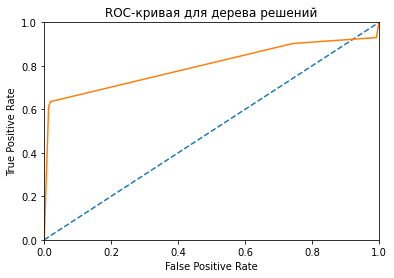

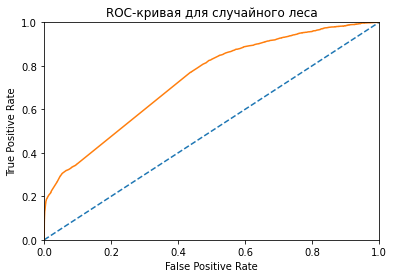

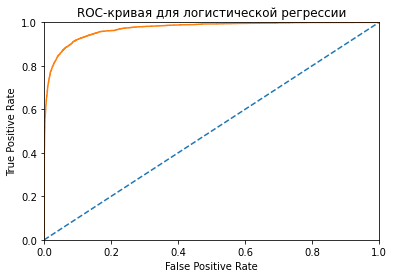

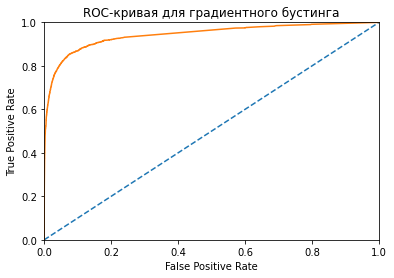

Для дерева решений F1-мера = 0.707 | Mетрика AUC-ROC = 0.800, accuracy = 0.948
Для случайного леса F1-мера = 0.054 | Mетрика AUC-ROC = 0.735, accuracy = 0.901
Для логистической регрессии F1-мера = 0.785 | Mетрика AUC-ROC = 0.971, accuracy = 0.960
Для XGBoost F1-мера = 0.745 | Mетрика AUC-ROC = 0.944, accuracy = 0.952


In [110]:
print('Лучшие модели')
(auc_roc_tree, auc_roc_forest, auc_roc_log, auc_roc_boost
 , f1_score_tree, f1_score_forest, f1_score_log, f1_score_boost
 , accuracy_tree, accuracy_forest, accuracy_log, accuracy_boost) = auc_roc_fun(tf_idf_valid, target_valid
                                                                , best_model_tree
                                                                , best_model_forest
                                                                , best_model_log
                                                                , best_model_boost)


print("Для дерева решений F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_tree, auc_roc_tree, accuracy_tree))
print("Для случайного леса F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_forest, auc_roc_forest, accuracy_forest))
print("Для логистической регрессии F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_log, auc_roc_log, accuracy_log))
print("Для XGBoost F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_boost, auc_roc_boost, accuracy_boost))


### **Вывод**
* Были обучены четыре модели с подбором гиперпараметров.
* С задачей справилась только логистическая регрессия, F1-мера = 0.780
* Чуть хуже XGBoost F1-мера = 0.740 и дерево решений F1-мера = 0.700
* Случайный лес показал худшие результаты.

### Борьба с дисбалансом

Для борьбы с дисбалансом воспользуемся техниками увеличение выборки (upsampling), уменьшение выборки(downsampling). Для исследования возьмём модель логистической регрессии как самую лучшую

#### Напишем функцию перебора параметров upsampling и downsampling с обучением на этих параметрах и выбором лучших результатов  

In [111]:
def search_best_parameters_sample(features_train, target_train, features_valid, target_valid):
    
    the_best_model_log = None
    best_result_log = 0
    best_method = None
    best_factor = None
    best_balanc = None

    for method in ['up', 'down']:        
        if method == 'up':
            for factor in np.arange(5, 6, 1):                                     
                (features_sampled, target_sampled) = sample(features_train, target_train, method, factor)
    
                (tf_idf_train_sampled, tf_idf_test, tf_idf_valid) = tf_idf(features_sampled, features_test, features_valid)
                
                best_model_log = search_best_parameter_log(tf_idf_train_sampled
                                                            , target_sampled
                                                            , tf_idf_valid
                                                            , target_valid)
                


                predictions_log = best_model_log.predict(tf_idf_valid)
                result_log = f1_score(target_valid, predictions_log)

                if result_log > best_result_log:
                    the_best_model_log = best_model_log
                    train_sampled = tf_idf_train_sampled
                    test = tf_idf_test
                    valid = tf_idf_valid
                    best_method = method
                    best_factor = factor
                                             
                
        if method == 'down':
            for factor in np.arange(0.9, 1.0, 0.1):                                      
                (features_sampled, target_sampled) = sample(features_train, target_train, method, factor)

                (tf_idf_train_sampled, tf_idf_test, tf_idf_valid) = tf_idf(features_sampled, features_test, features_valid)
            
                best_model_log = search_best_parameter_log(tf_idf_train_sampled
                                                            , target_sampled
                                                            , tf_idf_valid
                                                            , target_valid)
                

                predictions_log = best_model_log.predict(tf_idf_valid)
                result_log = f1_score(target_valid, predictions_log)

                if result_log > best_result_log:
                    the_best_model_log = best_model_log
                    train_sampled = tf_idf_train_sampled
                    test = tf_idf_test
                    valid = tf_idf_valid
                    best_method = method
                    best_factor = factor                                  
                
    return (the_best_model_log, train_sampled, test, valid, best_method, best_factor)

#### Найдем лучшую модель с учетом дисбаланса. 

Обучать будем LogisticRegression, при этом для борьбы с дисбалансом будем использовать увеличение выборки (upsampling), уменьшение выборки(downsampling)

In [112]:
the_best_model_log, train_sampled, test, valid, best_method, best_factor = search_best_parameters_sample(features_train
                                                                                                        , target_train
                                                                                                        , features_valid
                                                                                                        , target_valid)


Соотношение меток 1 и 0 в target_train: 1.766964560862866
f1_score Logistic 0.7641349560930518 10 30
f1_score Logistic 0.7618607516943932 10 35
f1_score Logistic 0.7647511939608689 11 30
f1_score Logistic 0.762756281794358 11 35
Соотношение меток 1 и 0 в target_train: 7.9513097072419106
f1_score Logistic 0.7860276746540668 10 30
f1_score Logistic 0.7857744817124557 10 35
f1_score Logistic 0.784656796769852 11 30
f1_score Logistic 0.7847292297342752 11 35


In [113]:
print('Лучшая модель с учетом дисбаланса:')
print(the_best_model_log)
print('Лучшая метод для борьбы с дисбалансом:', best_method)
print('Лучший коэффициент для метода ', best_method, ':', best_factor)

Лучшая модель с учетом дисбаланса:
LogisticRegression(C=30, max_iter=10, random_state=12345, solver='liblinear')
Лучшая метод для борьбы с дисбалансом: down
Лучший коэффициент для метода  down : 0.9


### **Вывод**
* Метод downsampling смог незначительно улучшить f1-меру до 0.786

#### Нашли лучшие модели с учетом дисбаланса.  Построим ROC-кривую и найдем метрику качества AUC-ROC для каждой модели

In [114]:
def auc_roc(features_valid, target_valid, model_log):
 
    auc_roc_log = 0
    accuracy_log = 0
    f1_score_log = 0
    i = 0
    list = ['для логистической регрессии']
        
    predictions = model_log.predict(features_valid) 
    accuracy = accuracy_score(target_valid, predictions)
    result = f1_score(target_valid, predictions)

    probabilities_valid = model_log.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    text = 'ROC-кривая для логистической регрессии'

    plt.figure()

    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(text)
    plt.show()
    auc_roc_log = roc_auc_score(target_valid, probabilities_one_valid)
    f1_score_log = result
    accuracy_log = accuracy            
            
    return (auc_roc_log
            , f1_score_log
            , accuracy_log) 

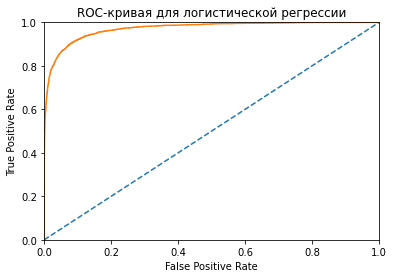

Для логистической регрессии F1-мера = 0.786 | Mетрика AUC-ROC = 0.971, accuracy = 0.960


In [115]:
(auc_roc_log
, f1_score_log
, accuracy_log) = auc_roc(valid, target_valid, the_best_model_log)


print("Для логистической регрессии F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_log, auc_roc_log, accuracy_log))


Выбираем модель LogisticRegression для тестирования на тестовой выборке

## Тестирование модели

Проверим нашу лучшую модель  на тестовой выборке

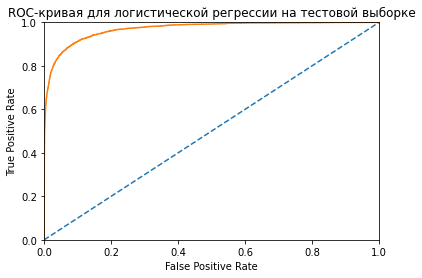

Для логистической регрессии на тестовой быборке F1-мера = 0.777 | Mетрика AUC-ROC = 0.970, accuracy = 0.959


In [116]:
predictions = the_best_model_log.predict(test) 
accuracy = accuracy_score(target_test, predictions)
result = f1_score(target_test, predictions)
probabilities_test = the_best_model_log.predict_proba(test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')


plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для логистической регрессии на тестовой выборке')
plt.show() 


print("Для логистической регрессии на тестовой быборке F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}"
      .format(result, auc_roc, accuracy))

### **Вывод**
* Логистическая регрессия на тестовой выборке показала отличные значения: F1-мера = 0.78 | Метрика AUC-ROC = 0.970, accuracy = 0.959
* Можно сделать вывод что для текстов больше подходит модель логистической регрессии, если не считать модели типа bert.
* Задание выполнено F1-мера = 0.78 (больше 0.75)

## Классификация на эмбеддингах

Ниже я привожу пример для модели bert, но к сожалению процесс перевода текста в эмбединги этой моделью занимает огромное количество времени. Я рандомно урезал данные до выборки с 2000 строк и это заняло почти сутки на ноутбуке.

### Загружаем перобученные модель и токинезатор

In [117]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

In [118]:
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Делаем рандомную выборку в 2000 строк датафрейма

In [119]:
df = df.sample(2000, random_state=12345).reset_index(drop=True)

In [120]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2000 non-null   object
 1   toxic      2000 non-null   int64 
 2   lemm_text  2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


,text,toxic,lemm_text
0,Ahh shut the fuck up you douchebag sand nigger \n\nGo blow up some more people you muslim piece of shit. Fuck you sand nigger i will find u in real life and slit your throat.,1,ahh shut fuck douchebag sand nigger go blow people muslim piece shit fuck sand nigger find u real life slit throat
1,"""\n\nREPLY: There is no such thing as Texas Commerce Bank of Chicago. Likewise, there is no such thing as the United Farmers Bank of Baltimore and Albuquerque. So Salvio, you are incorrect. If you want to prevent even the remote possibility of confusion, then you should not be allowed to use your name, Salvio, because there may be confusion that you are related to Salvador Dali.\n\n""",0,reply thing texas commerce bank chicago likewise thing united farmer bank baltimore albuquerque salvio incorrect want prevent even remote possibility confusion allow use name salvio may confusion related salvador dali
2,"Reply\nHey, you could at least mention Jasenovac and 700 000 killed (not only serbs) but you say it's all bs, well, what is vandalism, death of innocent, or putting truth here?",0,reply hey least mention jasenovac kill serb say b well vandalism death innocent put truth
3,"Thats fine, there is no deadline ) chi?",0,thats fine deadline chi
4,"""\n\nDYK nomination of Mustarabim\n Hello! Your submission of Mustarabim at the Did You Know nominations page has been reviewed, and there still are some issues that may need to be clarified. Please review the comment(s) underneath and respond there as soon as possible. Thank you for contributing to Did You Know! (talk • contribs) """,0,dyk nomination mustarabim hello submission mustarabim know nomination page review still issue may need clarify please review comment underneath respond soon possible thank contribute know talk contribs


### Пишем функцию токинезирования текста с  маской для важных токенов

In [121]:
tokenized = df['text'].apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512))

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [122]:
print(padded.shape)
print(attention_mask.shape)

(2000, 512)
(2000, 512)


### Разобьем на батчи и из тензора извлечём нужные элементы и добавим в список всех эмбеддингов.

In [125]:
batch_size = 50
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])

        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        embeddings.append(batch_embeddings[0][:,0,:].numpy())

  0%|          | 0/40 [00:00<?, ?it/s]

что-то локально счетчик не работает поэтому просто вывод "1" поставил чтоб виден был прогресс

### Соберём все эмбеддинги в матрицу признаков.

In [126]:
features = np.concatenate(embeddings)
type(features)
print(features.shape)

(2000, 768)


###  Создадим три выборки: обучающую, валидационного и тестовую

In [127]:
features_train = features[:1200]
features_valid = features[1200:1600]
features_test = features[1600:]
target_train = df['toxic'][:1200]
target_valid = df['toxic'][1200:1600]
target_test = df['toxic'][1600:]

In [128]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(1200, 768)
(400, 768)
(400, 768)
(1200,)
(400,)
(400,)


### Обучим модели

In [129]:
(best_model_tree
 , best_model_forest
 , best_model_log
 , best_model_boost) = search_best_parameters(features_train
                                            , target_train
                                            , features_valid
                                            , target_valid)

print('Лучшие модели:')
print(best_model_tree)
print(best_model_forest)
print(best_model_log)
print(best_model_boost)

f1_score tree 0.4186046511627907 30 gini best
f1_score tree 0.24390243902439024 30 gini random
f1_score tree 0.4888888888888889 30 entropy best
f1_score tree 0.410958904109589 30 entropy random
f1_score tree 0.4186046511627907 35 gini best
f1_score tree 0.24390243902439024 35 gini random
f1_score tree 0.4888888888888889 35 entropy best
f1_score tree 0.410958904109589 35 entropy random
f1_score tree 0.4186046511627907 40 gini best
f1_score tree 0.24390243902439024 40 gini random
f1_score tree 0.4888888888888889 40 entropy best
f1_score tree 0.410958904109589 40 entropy random
f1_score tree 0.4186046511627907 45 gini best
f1_score tree 0.24390243902439024 45 gini random
f1_score tree 0.4888888888888889 45 entropy best
f1_score tree 0.410958904109589 45 entropy random
f1_score tree 0.4186046511627907 50 gini best
f1_score tree 0.24390243902439024 50 gini random
f1_score tree 0.4888888888888889 50 entropy best
f1_score tree 0.410958904109589 50 entropy random
f1_score Forest 0.387096774193

Лучшие модели


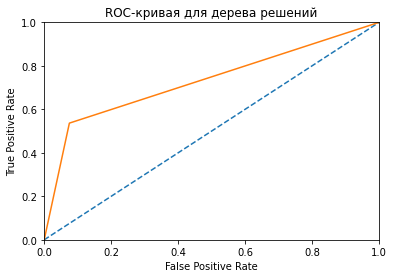

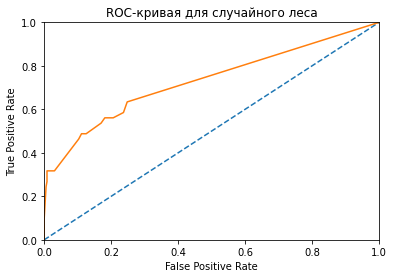

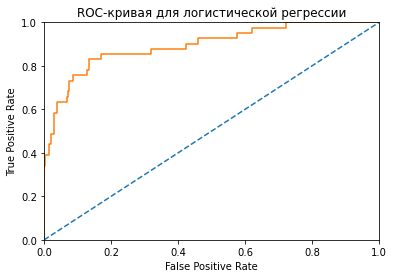

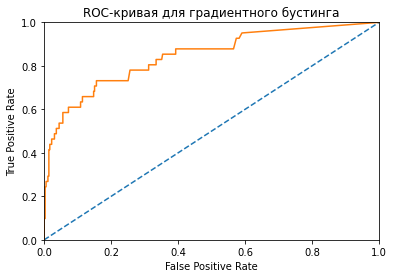

Для дерева решений F1-мера = 0.489 | Mетрика AUC-ROC = 0.731, accuracy = 0.885
Для случайного леса F1-мера = 0.456 | Mетрика AUC-ROC = 0.730, accuracy = 0.922
Для логистической регрессии F1-мера = 0.588 | Mетрика AUC-ROC = 0.894, accuracy = 0.930
Для XGBoost F1-мера = 0.531 | Mетрика AUC-ROC = 0.846, accuracy = 0.925


In [130]:
print('Лучшие модели')
(auc_roc_tree, auc_roc_forest, auc_roc_log, auc_roc_boost
 , f1_score_tree, f1_score_forest, f1_score_log, f1_score_boost
 , accuracy_tree, accuracy_forest, accuracy_log, accuracy_boost) = auc_roc_fun(features_valid, target_valid
                                                                , best_model_tree
                                                                , best_model_forest
                                                                , best_model_log
                                                                , best_model_boost)


print("Для дерева решений F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_tree, auc_roc_tree, accuracy_tree))
print("Для случайного леса F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_forest, auc_roc_forest, accuracy_forest))
print("Для логистической регрессии F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_log, auc_roc_log, accuracy_log))
print("Для XGBoost F1-мера = {:.3f} | Mетрика AUC-ROC = {:.3f}, accuracy = {:.3f}".format(
        f1_score_boost, auc_roc_boost, accuracy_boost))


### **Вывод:**
* Были обучены четыре модели с подбором гиперпараметров.
* О результатах трудно судит на такой маленькой выборке, но уже видно что логистическая регрессия на эмбедингах бердом близка к TF-IDF. Да и случайный лес стал лучше выглядеть.

## Выводы
В качестве исходных данных нам был предоставлен датасет и мы:
* Загрузили данные. Обработка не требуется. Требуется подготовка признаков для обучения моделей.
* Написали функции лемматизации и очистки текста
* Лемматизировали и очистили текст
* Написали функцию разделения данных c отображением дисбаланса меток 1 и 0
* Разделили данные на обучающую, валидационную и тестовую выборки
* Создадим три выборки: обучающую, валидационную и тестовую
* Напишем функцию "борьбы" с дисбалансом, воспользуемся техниками увеличение выборки (upsampling), уменьшение выборки(downsampling).

Далее:
* Были обучены четыре модели с подбором гиперпараметров.
* С задачей справилась только логистическая регрессия, F1-мера = 0.780
* Чуть хуже XGBoost F1-мера = 0.740 и дерево решений F1-мера = 0.700
* Случайный лес показал худшие результаты.

После борьбы с дисбалансом:
* Метод downsampling смог незначительно улучшить f1-меру до 0.783

Результаты выбора модели:
* Логистическая регрессия на тестовой выборке показала отличные значения: F1-мера = 0.780 | Метрика AUC-ROC = 0.968, accuracy = 0.959
* Можно сделать вывод что для текстов больше подходит модель логистической регрессии, если не считать модели типа bert.
* Задание выполнено F1-мера = 0.780 (больше 0.75)

Классификация на эмбеддингах на небольшой выборке (2000) показала:
* Были обучены четыре модели с подбором гиперпараметров.
* О результатах трудно судит на такой маленькой выборке, но уже видно, что логистическач регрессия на эмбедингах бердом близка к TF-IDF. Случайный лес стал лучше выглядеть. Думаю, результаты улучшатся если взять выборку в несколько раз больше.

Подытожить работу можно так:
* Выбрана модель логистическач регрессия с классификацией текста методом TF-IDF
* В зависимости от ситуации необходимо подбирать именно ту модель которая будет показывать оптимальные результаты и не обязательно использовать классификацию на эмбеддингах, полученных с помощью модели BERT. Как в данном случае.